Name: Ayhem Bouabid

Email: a.bouabid@innopolis.university

## Assignment 1: The value iteration algorithm

Your task is to solve the Robot Cleaning problem using the Value Iteration algorithm.

1- Based on your understanding write down the pseudo-code for Value Iteration algorithm.

2- Complete the implementation for value iteration algorithm. Basically you need to only complete the `MDP.state_utility()` method, comment on your results.

3- Make sure to provide your detailed explanation for the result.

4- Explain in detail the results you got in comparison with the Policy Iteration algorithm in your own words based on your understanding.


**Note:** Your grade will be based on your understanding of the algorithm and your analysis to the results. Cheating will be punished by nullifying.



# Pseudo Code 


1. denoting the value function of each state by $V(s)$ and $V$ the array containing the value of each state, we randomly initialize $V$ (for example $V(s) = 0$ for all $s$)

2. Repeat:
    
    $\Delta \leftarrow 0$ 
    
    For each state $s$ in $S$:     
    
    $$ V(s) \leftarrow \max_{a \in A} \sum_{s' \in \mathbb{S}, r \in \mathbb{R}} P(s', r | s, a) \cdot [r + \gamma \cdot V(s')]$$
    
    
    $$\Delta \leftarrow \max(\Delta, |V(s) - V'(s)|)$$

    Until $ \Delta < \epsilon$ ( $\epsilon$ is a small number)

where $\sum_{s' \in \mathbb{S}, r \in \mathbb{R}}$ iterates over all possible pairs of next states and rewards in the state-space $\mathbb{S}$ and the reward-space $\mathbb{R}$

3. Policy extraction:

    For each state $s$ in $S$: 
        
    $$\pi(s) \leftarrow \arg\max_{a \in A} \sum_{s' \in \mathbb{S}, r \in \mathbb{R}} P(s', r | s, a) \cdot [r + \gamma \cdot V(s')]$$

The pseudo code above is the most general form of the value iteration algorithm where it is assumed that a given state and action can lead to multiple pairs of next states and rewards and the probability of reaching the state $s'$ with a reward $r$ from $s$ by taking action $a$ is $P(s', r | s, a)$.

The algorithm can be easily updated / simplified to consider simpler scenarios. For example assuming the reward does not depend on the next state and only on the current state and the action taken. 

The update rule can be simplified: to use only the expected reward from the current state and action pair.


\begin{align}

V(s) &\leftarrow \max_{a \in A} \sum_{s' \in \mathbb{S}, r \in \mathbb{R}} P(s', r | s, a) \cdot [r + \gamma \cdot V(s')] \\

\sum_{s' \in \mathbb{S}, r \in \mathbb{R}} P(s', r | s, a) \cdot [r + \gamma \cdot V(s')] & = \sum_{s' \in \mathbb{S}} (\sum_{r \in \mathbb{R}} P(s', r | s, a) \cdot [r + \gamma \cdot V(s')]) \\

\implies &= \sum_{s' \in \mathbb{S}} (\sum_{r \in \mathbb{R}} P(s', r | s, a) \cdot r + \gamma \sum_{r \in \mathbb{R}} P(s', r | s, a) \cdot V(s')) \\

\implies &= \sum_{s' \in \mathbb{S}} (\sum_{r \in \mathbb{R}} P(s', r | s, a) \cdot r + \gamma  \cdot P(s' | s, a) \cdot V(s')) && \text{where $P(s' | s, a)$ is the probability of reaching $s'$ from $s$ by taking action $a$} 

\\

\implies &= \sum_{r \in \mathbb{R}}(\sum_{s' \in \mathbb{S}} (P(s', r | s, a) \cdot r)) + \gamma  \cdot \sum_{s' \in \mathbb{S}} (P(s' | s, a) \cdot V(s')) \\

\implies &= \sum_{r \in \mathbb{R}}((P(r | s, a) \cdot r)) + \gamma  \cdot \sum_{s' \in \mathbb{S}} (P(s' | s, a) \cdot V(s'))  && \text{where $P(r | s, a)$ is the probability of receiving reward $r$ from $s$ by taking action $a$} \\

\implies &= r(s, a) + \gamma  \cdot \sum_{s' \in \mathbb{S}} (P(s' | s, a) \cdot V(s')) && \text{where $r(s, a)$ is the expected reward from $s$ by taking action $a$} \\


\implies V(s) &\leftarrow \max_{a \in A} ~ (r(s, a) + \gamma  \cdot \sum_{s' \in \mathbb{S}} (P(s' | s, a) \cdot V(s'))) 

\end{align}



# Code

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import random
random.seed(0)
np.random.seed(0)

In [7]:
class MDP:
	def __init__(self):
		#Starting state vector
		#The agent starts from (1, 1)
		self.states = np.array([[0.0, 0.0, 0.0, 0.0],
									[0.0, 0.0, 0.0, 0.0],
									[1.0, 0.0, 0.0, 0.0]])

		self.rewards = np.array([-0.04, -0.04, -0.04,  +1.0,
									-0.04,   0.0, -0.04,  -1.0,
									-0.04, -0.04, -0.04, -0.04])
		self.num_states = 12

		# Probabilities Transition matrix loaded from file
		#(It is too big to write here)
		self.transits = np.load("T.npy")

		#Generate the first policy randomly
		# Nan=Nothing, -1=Terminal, 0=Up, 1=Left, 2=Down, 3=Right
		self.policy = np.random.randint(0, 4, size=(12)).astype(np.float32)
		self.policy[5] = np.nan
		self.policy[3] = self.policy[7] = -1

		#Utility vector
		self.values = np.array([0.0, 0.0, 0.0,  0.0,
								0.0, 0.0, 0.0,  0.0,
								0.0, 0.0, 0.0,  0.0])
		self.gamma = 0.999

		self.epsilon = 10 ** -10 # modified for higher accuracy
		self.iteration = 0
		

	def _state_utility_given_action(self, current_state:int, action: int) -> float:
		"""
		This function returns the		
		"""			
		# 2. find the probabilities of reaching the next state, from state 's' and the given action
		next_state_probs = self.transits[current_state, :, action] # [current_state, all_possible_next_states, the given action]
		
		su = 0
		for next_state, prob in enumerate(next_state_probs):
			su += prob * (self.values[next_state])

		return su.item()

	def state_utility(self, current_state: int) -> float:
		if current_state in [3, 7] or np.isnan(self.policy[current_state]):
			return self.rewards[current_state].item()

		action_utility_values = []

		for action in range(4):
			action_utility_values.append(self._state_utility_given_action(current_state, action))

		return self.rewards[current_state].item() + self.gamma * max(action_utility_values)


	def expected_action(self):
		"""Return the expected action.

		It returns an action based on the
		expected utility of doing a in state s,
		according to T and u. This action is
		the one that maximize the expected
		utility.

		@return expected action (int)
		"""
		actions = np.zeros(4)
		
		for action in range(4):
			#Expected utility of doing a in state s, according to T and u.
			actions[action] = np.sum(np.multiply(self.values, np.dot(self.states, self.transits[:,:,action])))

		return np.argmax(actions)
	  


In [8]:
def generate_graph(utility_list):
    """Given a list of utility arrays (one for each iteration)
        it generates a matplotlib graph and save it as 'output.jpg'
    """
    name_list = ('(1,3)', '(2,3)', '(3,3)', '+1', '(1,2)', '#', '(3,2)', '-1', '(1,1)', '(2,1)', '(3,1)', '(4,1)')
    color_list = ('cyan', 'teal', 'blue', 'green', 'magenta', 'black', 'yellow', 'red', 'brown', 'pink', 'gray', 'sienna')
    counter = 0
    index_vector = np.arange(len(utility_list))

    for state in range(12):
        state_list = list()

        for utility_array in utility_list:
            state_list.append(utility_array[state])

        plt.plot(index_vector, state_list, color=color_list[state], label=name_list[state])
        counter += 1

    #Adjust the legend and the axis
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.4), ncol=3, fancybox=True, shadow=True)
    plt.ylim((-1.1, +1.1))
    plt.xlim((1, len(utility_list)-1))
    plt.ylabel('Utility', fontsize=15)
    plt.xlabel('Iterations', fontsize=15)
    plt.savefig("./output.jpg", dpi=500)


def print_policy(p, shape):
    """Printing utility.

    Print the policy actions using symbols:
    ^, v, <, > up, down, left, right
    * terminal states
    # obstacles
    """
    counter = 0
    policy_string = ""

    for row in range(shape[0]):

        for col in range(shape[1]):
            
            if(p[counter] == -1): policy_string += " *  "
            elif(p[counter] == 0): policy_string += " ^  "
            elif(p[counter] == 1): policy_string += " <  "
            elif(p[counter] == 2): policy_string += " v  "
            elif(p[counter] == 3): policy_string += " >  "
            elif(np.isnan(p[counter])): policy_string += " #  "
            counter += 1

        policy_string += '\n'

    print(policy_string)

In [9]:
mdp = MDP()
#List containing the data for each iteation
graph_list = list()

=================== FINAL RESULT ==================
Iterations: 35
Delta: 3.569367024169878e-14
Gamma: 0.999
Epsilon: 1e-10
[0.80796344 0.86539911 0.91653199 1.        ]
[ 0.75696624  0.          0.65836281 -1.        ]
[0.69968297 0.64882108 0.60471976 0.38150431]
 >   >   >   *  
 ^   #   ^   *  
 ^   <   <   <  



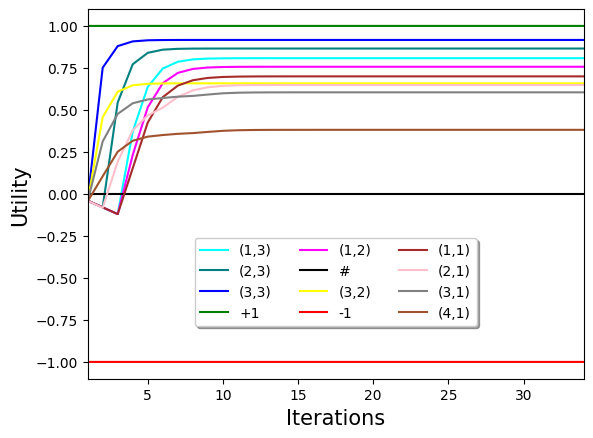

In [10]:
while True:
    
    delta = 0
    # u = mdp.values
    u_old = mdp.values.copy()
    mdp.iteration += 1
    graph_list.append(u_old)
    
    for s in range(12):
        mdp.states = np.zeros((1,mdp.num_states))
        mdp.states[0,s] = 1.0
        mdp.values[s] = mdp.state_utility(s)
        u = mdp.values.copy()
        delta = max(delta, np.abs(u[s] - u_old[s])) #Stopping criteria

    if delta < mdp.epsilon * (1 - mdp.gamma) / mdp.gamma:
            print("=================== FINAL RESULT ==================")
            print("Iterations: " + str(mdp.iteration))
            print("Delta: " + str(delta))
            print("Gamma: " + str(mdp.gamma))
            print("Epsilon: " + str(mdp.epsilon))
            print("===================================================")
            print(u[0:4])
            print(u[4:8])
            print(u[8:12])
            print("===================================================")

            for ss in range(12):

              if not np.isnan(mdp.policy[ss]) and not mdp.policy[ss]==-1:
                  mdp.states = np.zeros((1,12))
                  mdp.states[0,ss] = 1.0
                  #2- Policy improvement
                  a = mdp.expected_action()
                  if a != mdp.policy[ss]: mdp.policy[ss] = a

            print_policy(mdp.policy, shape=(3,4))
            print("===================================================")
            break

generate_graph(graph_list)

# Results Explanation

1. The Value Iteration algorithm converged to a policy very close to the optimal policy in only 35 iterations. The algorithm could have converged in less iterations if the epsilon was larger. (it is set to 10 ^ {-10})

2. As we can see the utility values stabilized after around 10 iterations which can be explained by the simplicity of the MDP. Our MDP is simple in the sense that the reward is dependent only on the state and neither the action nor the previous state. 

3. The states (3, 5, 7) have the same utility values across the entire algorithm because they are terminal states: IN other words, the transition probabilities are set to 0 for all other states making the update rule: 

$$V(s) = r(s) ~|~ s \in \{3, 5, 7\}$$



The value iteration algorithm converges to very simile value function as the policy iteration algorithm. However, there are a few differences worthy noting: 

1. Policy Iteration converges is less iteations (around 5) which is expected since a single iteration consists of both policy evaluation and policy improvement: assign each state to the action with the maximum value function. Hence, each iteration is guaranteed to make a more significant progress towards the optimal policy / value function

2. The value iteration converges in more iterations because each iteration uses an update based on the Ballman Optimality Equation. A single iteration is not as informed / robust as Policy iteration since there is policies are implicit.

3. A single Value iteration is less computationally expensive as it iterates only once through the state space. Hence the number of iterations is not a `fair` metric for comparison and the small number of states in our given problem is not a reliable indicator of the performance.

# 